In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [11]:
df=pd.read_csv('Classified Data')

In [12]:
df.head()

,Unnamed: 0,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


In [13]:
df.drop(['Unnamed: 0'],axis=1,inplace=True)

In [14]:
df.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


In [15]:
from sklearn.preprocessing import StandardScaler

In [16]:
Scaler=StandardScaler()

In [18]:
bf=df.drop(['TARGET CLASS'],axis=1)

In [19]:
bf.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167


In [20]:
gf=Scaler.fit_transform(bf)

In [21]:
ff=pd.DataFrame(gf)

In [22]:
ff.head()

,0,1,2,3,4,5,6,7,8,9
0,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510


In [23]:
X=ff

In [24]:
y=df['TARGET CLASS']

In [25]:
y

0      1
1      0
2      0
3      1
4      1
      ..
995    1
996    0
997    1
998    1
999    1
Name: TARGET CLASS, Length: 1000, dtype: int64

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [28]:
from sklearn.neighbors import KNeighborsClassifier

In [29]:
KNN=KNeighborsClassifier()

In [30]:
KNN.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [31]:
predo=KNN.predict(X_test)

In [32]:
from sklearn.metrics import accuracy_score

In [33]:
acc=accuracy_score(predo,y_test)

In [34]:
print(acc)

0.93


In [35]:
error_rate=[]
for i in range(1,50):
    CN=KNeighborsClassifier(n_neighbors=i)
    CN.fit(X_train,y_train)
    predo=CN.predict(X_test)
    error_rate.append(np.mean(predo!=y_test))

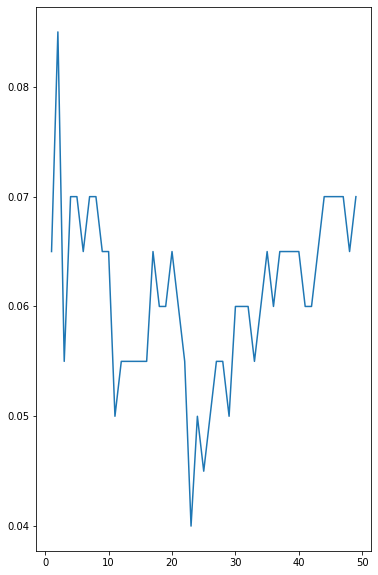

In [38]:
plt.figure(figsize=(6,10))
plt.plot(range(1,50),error_rate)


In [50]:
CN=KNeighborsClassifier(n_neighbors=23)
CN.fit(X_train,y_train)
predom=CN.predict(X_test)
    

In [51]:
accu=accuracy_score(predom,y_test)

In [52]:
print(accu)

0.96
